In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
%matplotlib inline

## Glass type classification
This exercise is based on the [Glass Identification Data Set from UCI](https://archive.ics.uci.edu/ml/datasets/glass+identification) which contains data about 214 samples of glass of different types (window, bottles, light bulbs etc.). The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence ... if it is correctly identified!

### The columns
 - 'Type' - type of glass
 - 'RI' - Refractive index (how much a ray is bent when entering the glass)
 - Concentration of 7 Different chemical elements:
   Na, Mg, Al, Si, K, Ca, Ba, Fe
   
You can read more about glass composition [here](https://www.cmog.org/article/chemistry-glass)

In [213]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


#### Take a look at descriptive statistics 

In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516523,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


#### Find the range (max - min) of values for each chemical element. Which elements would you expect to dominate the calculated distances between the samples?

In [215]:
for col in df.columns[1:-1]:
    print(col + " Range: " + str(df[col].max() - df[col].min()))

Na Range: 6.649999999999999
Mg Range: 4.49
Al Range: 3.21
Si Range: 5.599999999999994
K Range: 6.21
Ca Range: 10.760000000000002
Ba Range: 3.15
Fe Range: 0.51


#### There are 7 types of glass, but we will group them into 2 groups - windows glass and everything else

In [216]:
df['iswindow'] = (df.Type <=4).astype(int)

#### How many of window and non-window glass samples are there?

In [217]:
(df.iswindow == 0).sum(), (df.iswindow == 1).sum()

(51, 163)

#### Take a look at the histograms for some of the chemical elements

Text(0.5,0,'Si oxide as weight percent')

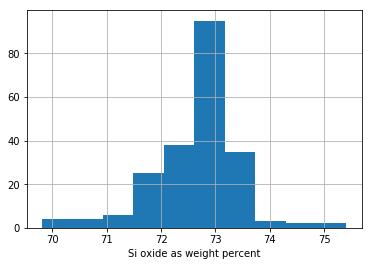

In [218]:
# [Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

element = 'Si'
df[element].hist()
plt.xlabel(element + ' oxide as weight percent')

#### Try different couples of parameters on the following plot and see how well (or not) they allow to visually distinguish between the window and non-windows glass

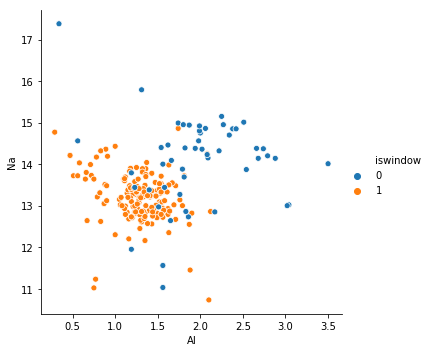

In [250]:
# ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
sns.relplot('Al', 'Na', hue='iswindow', data=df)

## Train a kNN classifier

#### Define the X and y variables for training
 - y - the 'iswindow' column
 - X - All the chemical elements and 'RI'

In [220]:
y = df.iswindow

In [221]:
X = df[df.columns[0:-2]]

#### Import the KNeighborsClassifier class (look up the right submodule)

In [222]:
from sklearn.neighbors import KNeighborsClassifier

#### Create an instance of the classifier with k set to 3

In [223]:
knnClassifier = KNeighborsClassifier()

#### Train (fit) the classifier

In [224]:
knnClassifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

#### Find the predictions for all of X

In [225]:
y_pred = knnClassifier.predict(X)

#### Find what faction of the predictions are correct

In [226]:
(y_pred == y).sum() / y_pred.size

0.9579439252336449

#### The above fraction of correct predictions is called accuracy score and can also be found using the sklearn.metrics.accuracy_score() function

In [227]:
from sklearn.metrics import accuracy_score

In [228]:
accuracy_score(y, y_pred)

0.9579439252336449

#### Create a knn classifier for each k in range between 1 and 30 and plot the resulting accuracy scores as a function of k
 - Why do you think the accuracy score is 1 for k=1 ?

In [251]:
ks = []
accuracy = []
for k in range(1, 31):
    knnClassifier2 = KNeighborsClassifier(n_neighbors=k)
    knnClassifier2.fit(X, y)
    y_pred2 = knnClassifier2.predict(X)
    ks.append(k)
    accuracy.append(accuracy_score(y, y_pred2))



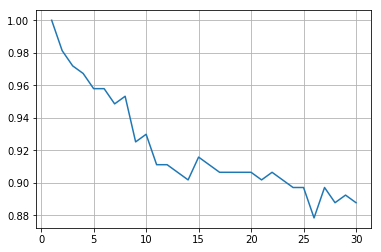

In [252]:
plt.plot(ks, accuracy)
plt.grid()

## Setting some data aside for testing

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
# The train_test_split() function splits the data into training and testing
# Training data will be used in fit() and testing to evaluate the preidction
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)

#### Take a look at the shapes of the resulting data frames

In [233]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((128, 9), (86, 9), (128,), (86,))

#### Repeat the plot of accuracy score vs k but now using the split data

In [234]:
ks_split = []
accuracy_split = []
for k in range(1, 30):
    knnClassifier2 = KNeighborsClassifier(n_neighbors=k)
    knnClassifier2.fit(X_train, y_train)
    y_pred2 = knnClassifier2.predict(X_test)
    ks_split.append(k)
    accuracy_split.append(accuracy_score(y_test, y_pred2))

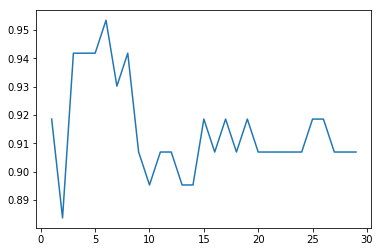

In [235]:
plt.plot(ks_split, accuracy_split)

#### Try changing the `random_state` in `train_test_split` and rerun the loop and the plot. Observe how different the plot is each time

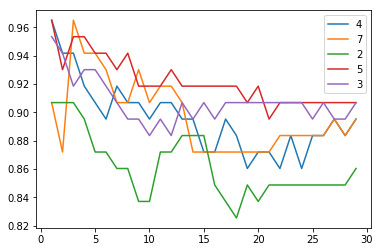

In [236]:
rand_vals = []
for i in range(5):
    rand_val = np.random.randint(10)
    rand_vals.append(rand_val)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=(rand_val))
    ks_split = []
    accuracy_split = []
    for k in range(1, 30):
        knnClassifier2 = KNeighborsClassifier(n_neighbors=k)
        knnClassifier2.fit(X_train, y_train)
        y_pred2 = knnClassifier2.predict(X_test)
        ks_split.append(k)
        accuracy_split.append(accuracy_score(y_test, y_pred2))

    plt.plot(ks_split, accuracy_split)
plt.legend(rand_vals)

#### Try using a DecisionTreeClassifier instead of kNN and repeat the accuracy score plot

In [237]:
from sklearn.tree import DecisionTreeClassifier 

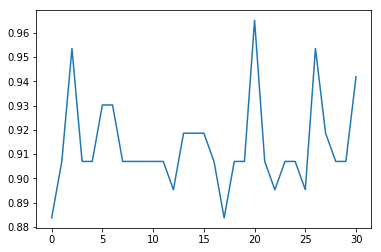

In [249]:
ks_tree = []
accuracy_tree = []
for k in range(31):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

    decisionTreeClassifier = DecisionTreeClassifier()

    decisionTreeClassifier.n_classes_ = k

    decisionTreeClassifier.fit(X_train, y_train)
    ks_tree.append(k)
    y_pred3 = decisionTreeClassifier.predict(X_test)

    accuracy_tree.append(accuracy_score(y_test, y_pred3))

plt.plot(ks_tree, accuracy_tree)